Button(description='Draw graph', style=ButtonStyle())

Dropdown(description='Cities:', options=('Kyiv', 'Odessa', 'Lviv', 'Kharkiv', 'Dnipro', 'Ivano-Frankivsk', 'Ch…

Dropdown(description='Data:', index=1, options=('Wind speed, m/s', 'Temperature, Celsius', 'Humidity, %', 'Clo…

Text(value='2019-03-10 22:58:54', description='Date from:', placeholder='Type here')

Text(value='2019-04-08 22:58:54', description='Date to:', placeholder='Type here')

Dropdown(description='Visualization', options=('Bars', 'Plot'), value='Bars')

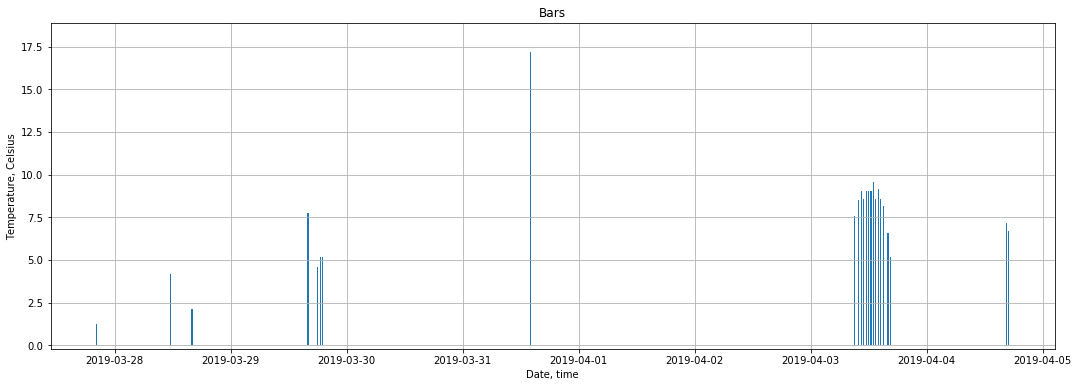

In [98]:
import requests
import json
import ipywidgets as widgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import re
from datetime import datetime
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from IPython.display import clear_output


def cities(msg):
    citylist = {"Kyiv": 709930,
                "Odessa": 698740,
                "Lviv": 702550,
                "Kharkiv": 706483,
                "Dnipro": 709930,
                "Ivano-Frankivsk": 707471,
                "Chernivtsi": 710719,
                "Vinnytsia": 689558,
                "Kriviy Rih": 703845,
                "Uzhhorod": 690548
                }
    return citylist[msg]


def avaibledata(msg):
    datalist = {"Wind speed, m/s": 'wind.speed',
                "Temperature, Celsius": 'main.temp',
                "Humidity, %": 'main.humidity',
                "Clouds, %": 'clouds.all',
                "Pressure, mmHg": "main.pressure"
                }
    return datalist[msg]
# code which refers to vizualization
def graph(msg, x_time, y_value, y_label):
    fig, ax = plt.subplots(figsize=(18, 6))
    plt.grid(True)
    #Changes for a better vizualisation
    bottom_y = min(y_value)
    top_y = max(y_value)
    k = abs(top_y/bottom_y)/10
    if top_y > 700: k = -10
    #print("k=", k)
    
    if bottom_y <= 0:
        bottom_y = bottom_y*1.02 - k
    else:
        bottom_y = bottom_y/1.02 - k
        
    if top_y <= 0:
        top_y = top_y/1.02 + k
    else:
        top_y = top_y*1.02 + k
    
    ax.set_ylim(bottom=bottom_y, top=top_y)
    
    if msg=="Plot":
        ax.plot(x_time, y_value)
    else:
        ax.bar(x_time, y_value, width=0.01)
        
    plt.xlabel('Date, time')
    plt.ylabel(y_label)
    plt.title(msg)
    return

%matplotlib inline

button = widgets.Button(description="Draw graph")
display(button)
out = widgets.Output()
city = widgets.Dropdown(
    options=["Kyiv", "Odessa", "Lviv", "Kharkiv", "Dnipro", "Ivano-Frankivsk", "Chernivtsi",
             "Vinnytsia", "Kriviy Rih", "Uzhhorod"],
    value="Kyiv",
    description='Cities:',
    disabled=False,
)

type_data = widgets.Dropdown(
    options=["Wind speed, m/s", "Temperature, Celsius", "Humidity, %", "Clouds, %", "Pressure, mmHg"],
    value='Temperature, Celsius',
    description='Data:',
    disabled=False,
)

date_from = widgets.Text(
    value='2019-03-10 22:58:54',
    placeholder='Type here',
    description='Date from:',
    disabled=False
)

date_to = widgets.Text(
    value='2019-04-08 22:58:54',
    placeholder='Type here',
    description='Date to:',
    disabled=False
)

type_graph = widgets.Dropdown(
    options=["Bars", "Plot"],
    value='Bars',
    description='Visualization',
    disabled=False,
)
display(city, type_data, date_from, date_to, type_graph)


def click_button(b):
    city_id = cities(city.value)
    arg = {"req": 1,
           "id": city_id,
           "data": avaibledata(type_data.value),
           "time_min": date_from.value,
           "time_max": date_to.value}
    r = requests.post('https://europe-west1-alpine-canto-236712.cloudfunctions.net/get-from-db', data=json.dumps(arg))

    tempdate = r.json()[0]#array which consist of time values
    x_time = []
    for i in tempdate:
        x_time.append(datetime.fromtimestamp(i))
    y_value = r.json()[1]#array which consist of data values
    y_label = str(type_data.value)
    if y_label == "Temperature, Celsius":
        for i in range(len(y_value)):
            y_value[i] -= 273
    if y_label == "Pressure, mmHg":
        for i in range(len(y_value)):
            y_value[i] = y_value[i] * 100 / 133.32
    
    graph(str(type_graph.value), x_time, y_value, y_label)

button.on_click(click_button)

# clear_output()